In [1]:
import numpy as np
import sklearn 
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from latexify import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        logits = self.linear(x)
        return logits

In [3]:
from sklearn.datasets import make_moons

In [4]:
X, y = make_moons(n_samples=100, noise=0.1)

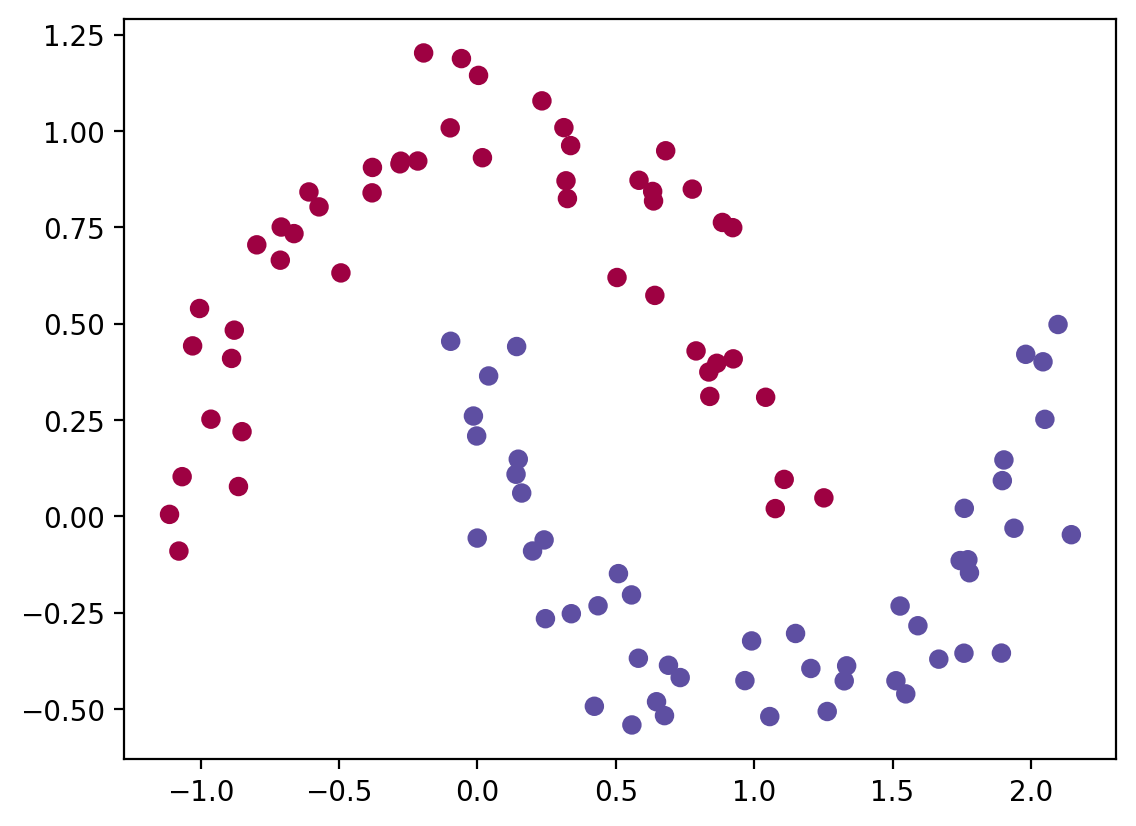

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [6]:
log_reg = LogisticRegression(2)

/Users/nipun/mambaforge/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


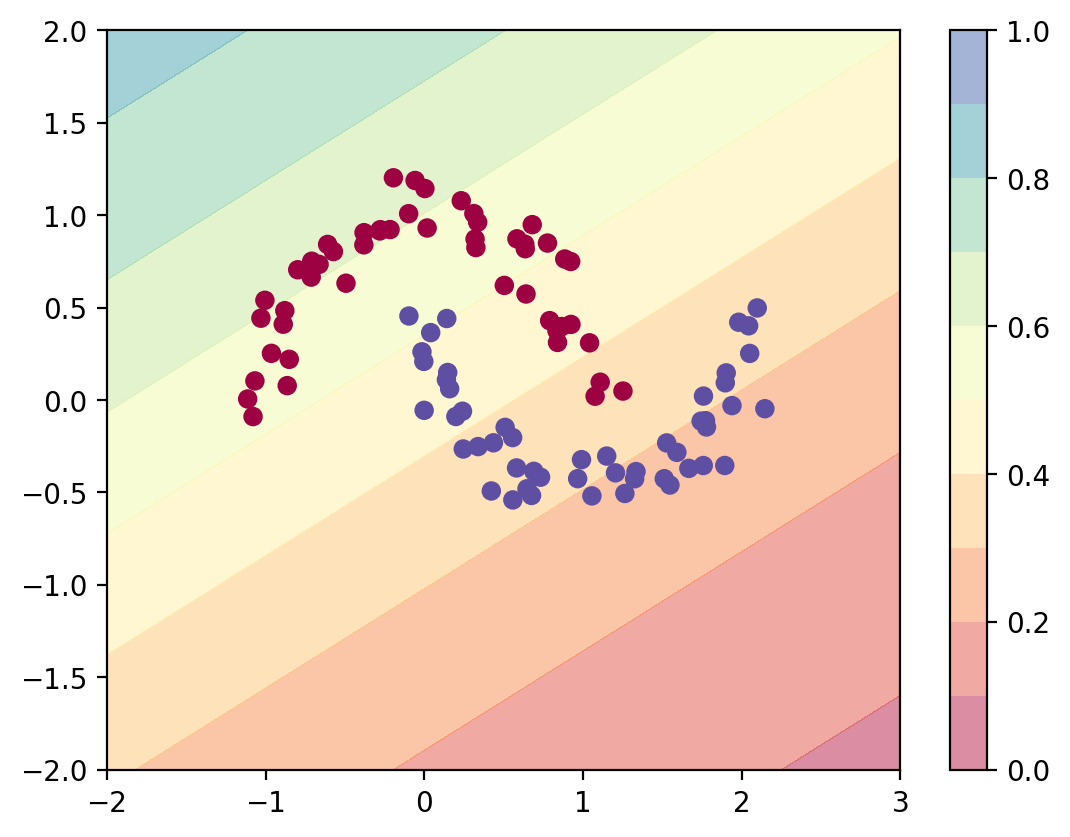

In [7]:
# Predict with the model

def predict_plot_grid(model):
    XX, YY = torch.meshgrid(torch.linspace(-2, 3, 100), torch.linspace(-2, 2, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid)
    probs = torch.sigmoid(logits).reshape(100, 100)
    plt.contourf(XX, YY, probs.detach().numpy(), levels=[0.0, 0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1.0], 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
predict_plot_grid(log_reg)
    
    

In [8]:


opt = torch.optim.Adam(log_reg.parameters(), lr=0.01)

converged = False
prev_loss = 1e8 
i = 0
while not converged:
    opt.zero_grad()
    logits = log_reg(torch.tensor(X, dtype=torch.float32))
    loss = nn.BCEWithLogitsLoss()(logits, torch.tensor(y, dtype=torch.float32).view(-1, 1))
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1


0 0.9349006414413452
10 0.8724980354309082
20 0.817572832107544
30 0.7688440084457397
40 0.7244434952735901
50 0.6841480731964111
60 0.648054838180542
70 0.6158449053764343
80 0.5871520638465881
90 0.5616370439529419
100 0.5389482378959656
110 0.5187534093856812
120 0.5007484555244446
130 0.48465821146965027
140 0.4702383279800415
150 0.4572741687297821
160 0.4455784261226654
170 0.434988796710968
180 0.4253652095794678
190 0.4165867269039154
200 0.4085492193698883
210 0.4011631906032562
220 0.3943515419960022
230 0.3880476653575897
240 0.38219425082206726
250 0.3767416477203369
260 0.37164685130119324
270 0.36687251925468445
280 0.36238619685173035
290 0.3581596612930298
300 0.3541681170463562
310 0.3503900170326233
320 0.34680625796318054
330 0.3434002697467804
340 0.340157151222229
350 0.33706405758857727
360 0.3341093361377716
370 0.3312827944755554
380 0.32857537269592285
390 0.3259788155555725
400 0.3234858810901642
410 0.32109004259109497
420 0.3187854290008545
430 0.31656676530

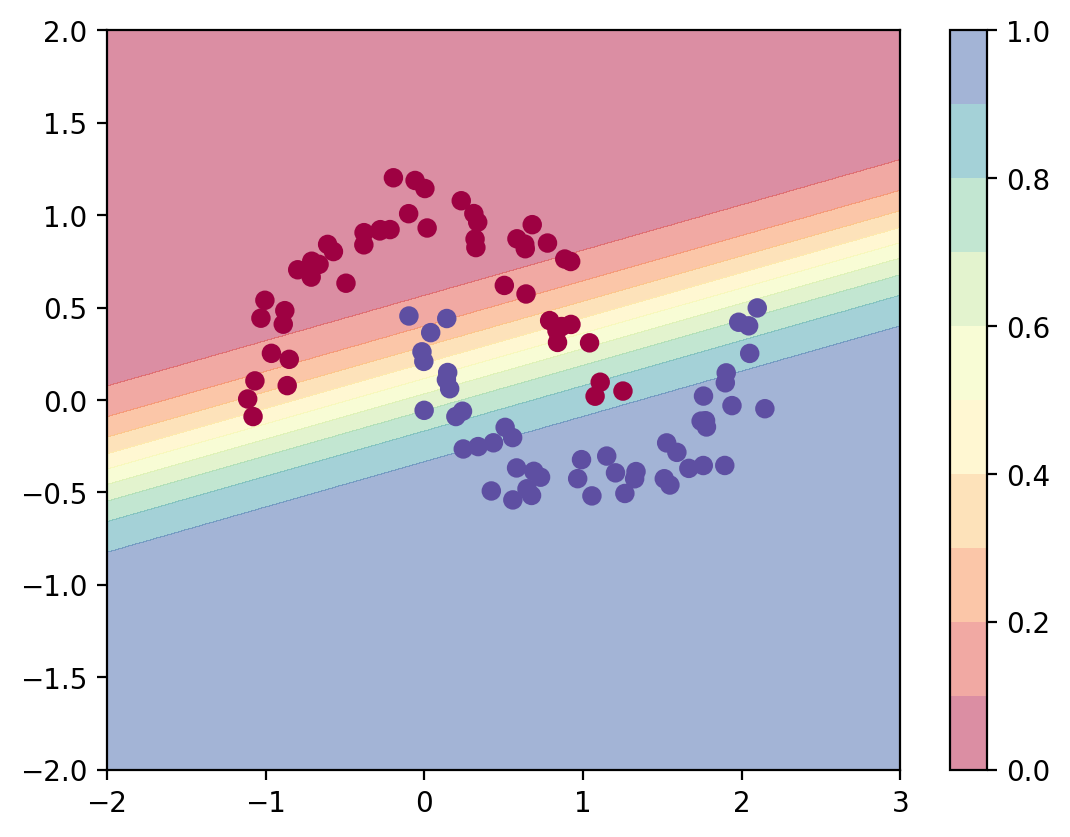

In [9]:
predict_plot_grid(log_reg)

In [10]:
# Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Sepal width')

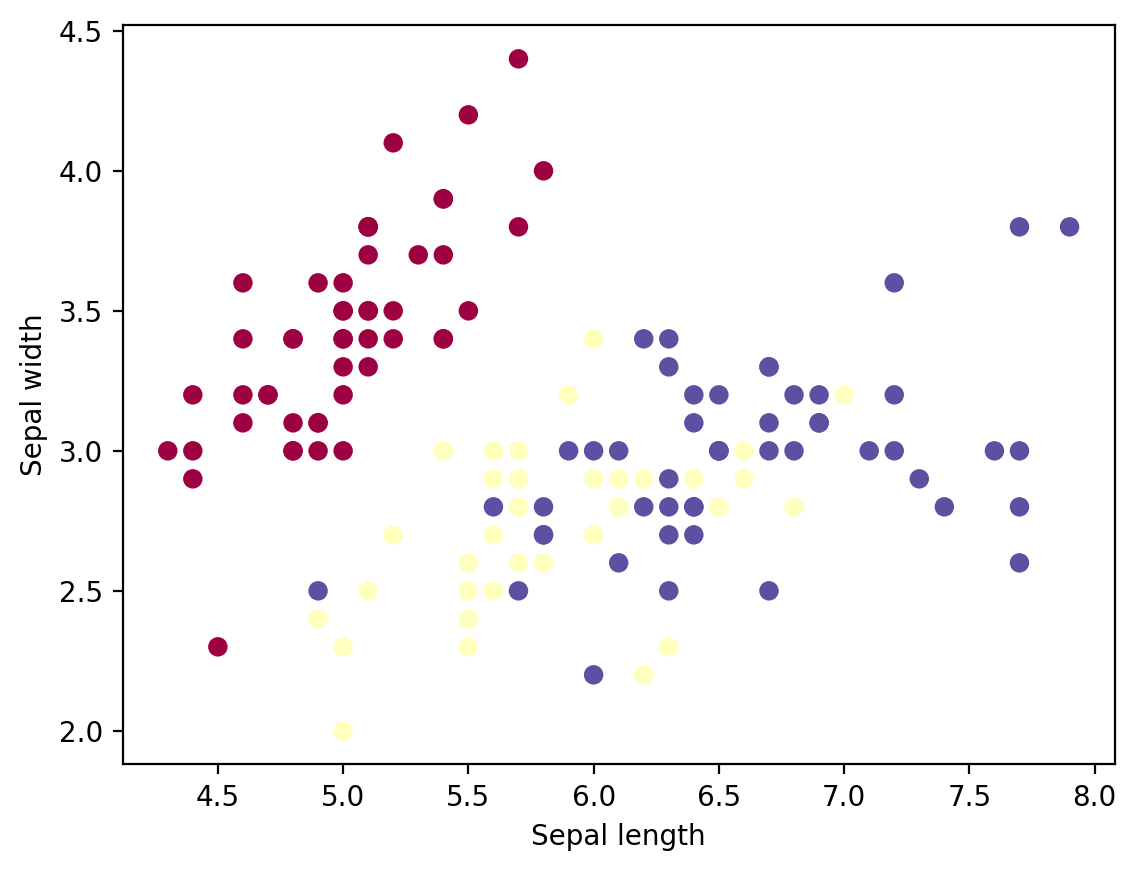

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [13]:
class ThreeClassLogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(ThreeClassLogisticRegression, self).__init__()
        self.linear1 = nn.Linear(input_dim, 1)
        self.linear2 = nn.Linear(input_dim, 1)
        self.linear3 = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        logits1 = self.linear1(x)
        logits2 = self.linear2(x)
        logits3 = self.linear3(x)
        return torch.cat([logits1, logits2, logits3], dim=-1)
    

class MultiClassLogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MultiClassLogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)
    
    def forward(self, x):
        logits = self.linear(x)
        return logits

In [14]:
mlr = ThreeClassLogisticRegression(2)

In [15]:
X_tensor = torch.tensor(X, dtype=torch.float32)[:,:2]
y_tensor = torch.tensor(y, dtype=torch.long)

In [16]:
mlr(X_tensor).shape

torch.Size([150, 3])

In [17]:
mlr_efficient = MultiClassLogisticRegression(2, 3)
mlr_efficient(X_tensor).shape

torch.Size([150, 3])

In [18]:
mlr_efficient(X_tensor[:5])

tensor([[-0.4276,  2.0524, -1.1928],
        [-0.4378,  1.7861, -1.3077],
        [-0.4070,  1.8339, -1.1492],
        [-0.4033,  1.7681, -1.1480],
        [-0.4122,  2.0762, -1.1135]], grad_fn=<AddmmBackward0>)

In [19]:

nn.Softmax(dim=-1)(mlr_efficient(X_tensor[:5])).sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

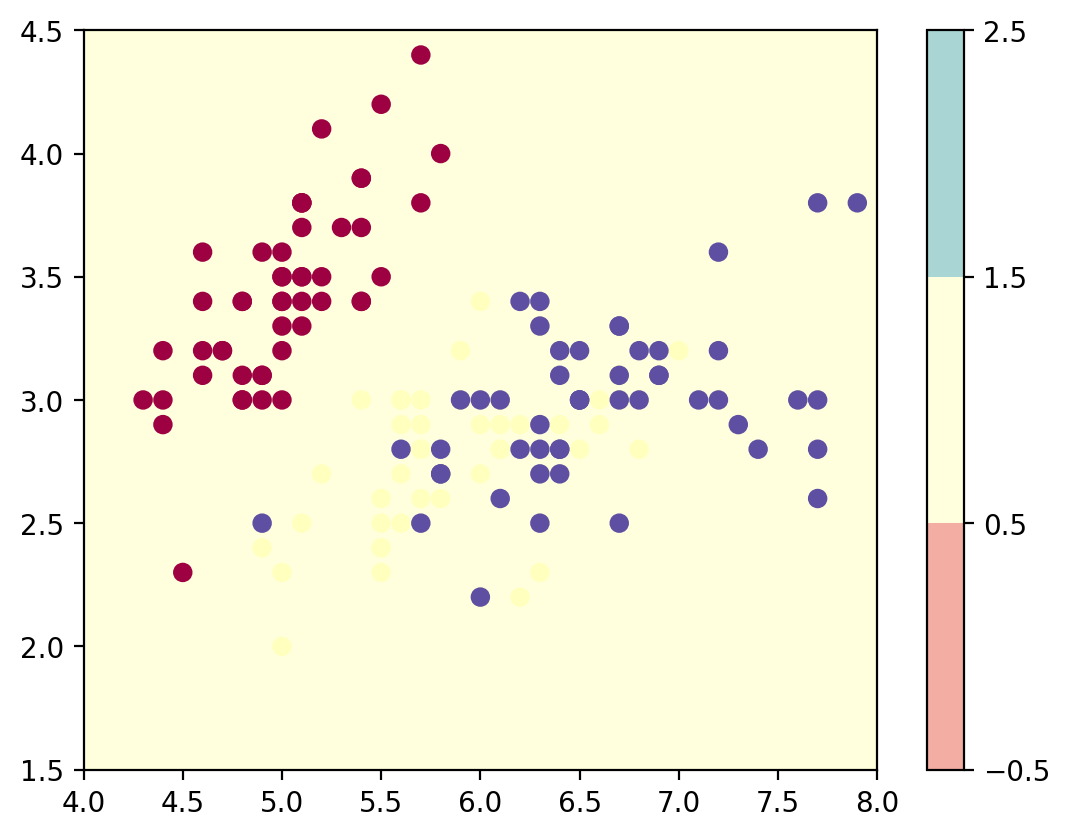

In [20]:
def plot_most_probable_class(model):
    XX, YY = torch.meshgrid(torch.linspace(4, 8, 100), torch.linspace(1.5, 4.5, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid)
    predicted_class = torch.argmax(logits, dim=-1)
    plt.contourf(XX, YY, predicted_class.reshape(100, 100).detach().numpy(), levels=[-0.5, 0.5, 1.5, 2.5], 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
plot_most_probable_class(mlr_efficient)

In [21]:
logits = mlr_efficient(X_tensor)
nn.Softmax(dim=-1)(logits[:5])

tensor([[0.0746, 0.8907, 0.0347],
        [0.0938, 0.8669, 0.0393],
        [0.0919, 0.8643, 0.0438],
        [0.0976, 0.8560, 0.0464],
        [0.0739, 0.8895, 0.0366]], grad_fn=<SoftmaxBackward0>)

In [22]:
opt = torch.optim.Adam(mlr_efficient.parameters(), lr=0.01)

converged = False
prev_loss = 1e8

i = 0
while not converged:
    opt.zero_grad()
    logits = mlr_efficient(X_tensor)
    loss = F.cross_entropy(logits, y_tensor)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1

0 2.2876317501068115
10 1.4277923107147217
20 1.1896789073944092
30 1.173270583152771
40 1.1399130821228027
50 1.1091488599777222
60 1.0889300107955933
70 1.065254807472229
80 1.0434192419052124
90 1.0214812755584717
100 1.0000522136688232
110 0.9791292548179626
120 0.9588465094566345
130 0.9392611980438232
140 0.9204307794570923
150 0.9023836255073547
160 0.885133683681488
170 0.8686791062355042
180 0.8530094027519226
190 0.8381044268608093
200 0.8239390254020691
210 0.8104835748672485
220 0.797706127166748
230 0.7855730056762695
240 0.7740503549575806
250 0.7631040811538696
260 0.7527009844779968
270 0.7428091168403625
280 0.733397364616394
290 0.7244365811347961
300 0.7158986330032349
310 0.7077574729919434
320 0.6999881863594055
330 0.6925678849220276
340 0.685474693775177
350 0.6786885261535645
360 0.6721901893615723
370 0.6659626960754395
380 0.6599892973899841
390 0.6542547345161438
400 0.6487451791763306
410 0.6434471607208252
420 0.6383485794067383
430 0.633437991142273
440 0.

In [23]:
mlr_efficient(X_tensor[:5])

tensor([[ 3.3141, -2.0900, -3.7057],
        [ 1.1409, -1.1217, -3.2703],
        [ 3.4758, -1.6582, -4.0551],
        [ 3.3553, -1.4965, -4.0989],
        [ 4.4815, -2.3582, -4.0981]], grad_fn=<AddmmBackward0>)

In [24]:
pred = F.softmax(mlr_efficient(X_tensor), dim=-1).detach().numpy()

In [25]:
import pandas as pd

In [26]:
df = pd.DataFrame(pred, columns=iris.target_names)
df["GT"] = iris.target
df

,setosa,versicolor,virginica,GT
0,0.994636,0.004474,0.000889,0
1,0.895877,0.093246,0.010877,0
2,0.993612,0.005855,0.000533,0
3,0.991676,0.007750,0.000574,0
4,0.998743,0.001069,0.000188,0
...,...,...,...,...
145,0.000091,0.306116,0.693793,2
146,0.000021,0.511070,0.488909,2
147,0.000359,0.380096,0.619545,2
148,0.070860,0.428247,0.500893,2


In [27]:
# Find prediction
y_pred = pred.argmax(axis=-1)

df["Predicted Class"] = y_pred


In [28]:
df

,setosa,versicolor,virginica,GT,Predicted Class
0,0.994636,0.004474,0.000889,0,0
1,0.895877,0.093246,0.010877,0,0
2,0.993612,0.005855,0.000533,0,0
3,0.991676,0.007750,0.000574,0,0
4,0.998743,0.001069,0.000188,0,0
...,...,...,...,...,...
145,0.000091,0.306116,0.693793,2,2
146,0.000021,0.511070,0.488909,2,1
147,0.000359,0.380096,0.619545,2,2
148,0.070860,0.428247,0.500893,2,2


In [29]:
# Accuracy
(y_pred == iris.target).mean()

0.8266666666666667

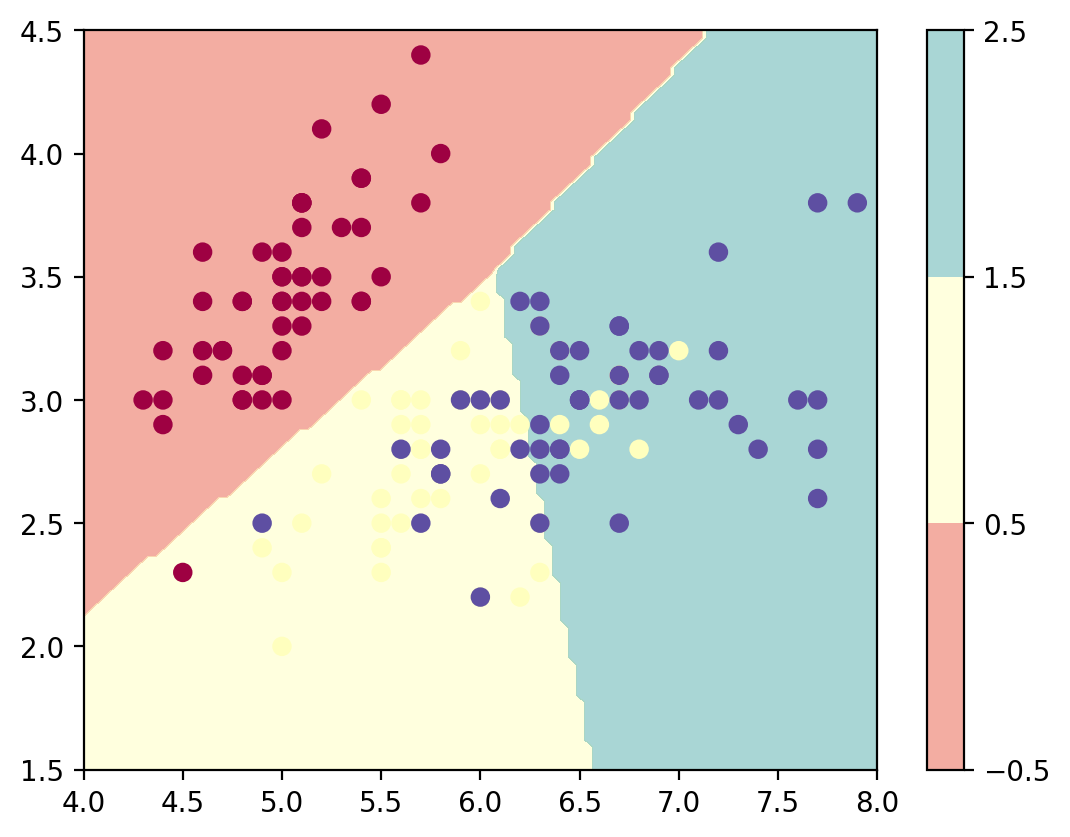

In [30]:
plot_most_probable_class(mlr_efficient)

In [31]:
# Add more features like x^2, xy, y^2

X = iris.data
y = iris.target

X = np.concatenate([X, X**2, X[:, [0]]*X[:, [1]], X[:, [1]]**2], axis=-1)

X_tensor = torch.tensor(X, dtype=torch.float32)

mlr_efficient = MultiClassLogisticRegression(10, 3)


opt = torch.optim.Adam(mlr_efficient.parameters(), lr=0.01)

converged = False

prev_loss = 1e8

i = 0
while not converged:
    opt.zero_grad()
    logits = mlr_efficient(X_tensor)
    loss = F.cross_entropy(logits, y_tensor)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1
    


0 4.175729751586914
10 0.7128309011459351
20 0.42325228452682495
30 0.35874807834625244
40 0.2861122786998749
50 0.24453814327716827
60 0.21917879581451416
70 0.19883905351161957
80 0.18379421532154083
90 0.17121852934360504
100 0.16081109642982483
110 0.15182484686374664
120 0.14402928948402405
130 0.13717801868915558
140 0.13111360371112823
150 0.125710129737854
160 0.1208672821521759
170 0.11650418490171432
180 0.11255431920289993
190 0.10896281152963638
200 0.1056838408112526
210 0.10267896950244904
220 0.09991569072008133
230 0.09736639261245728
240 0.09500744193792343
250 0.0928184986114502
260 0.0907820537686348
270 0.08888282626867294
280 0.08710754662752151
290 0.08544456958770752
300 0.0838836133480072
310 0.0824156403541565
320 0.0810326412320137
330 0.07972748577594757
340 0.07849381864070892
350 0.07732591778039932
360 0.07621872425079346
370 0.07516761124134064
380 0.07416845113039017
390 0.0732174664735794
400 0.07231126725673676
410 0.07144675403833389
420 0.07062112540

In [32]:
# Accuracy
pred = F.softmax(mlr_efficient(X_tensor), dim=-1).detach().numpy()
y_pred = pred.argmax(axis=-1)
(y_pred == iris.target).mean()

0.9866666666666667